Kolom dataset setelah penggantian: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')
Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64
Nama kolom setelah penggantian: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

Distribusi target:
 target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  pet

<ipython-input-5-0d6dec8a1308>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


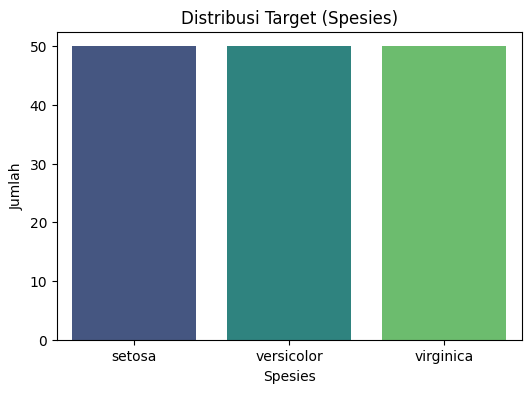

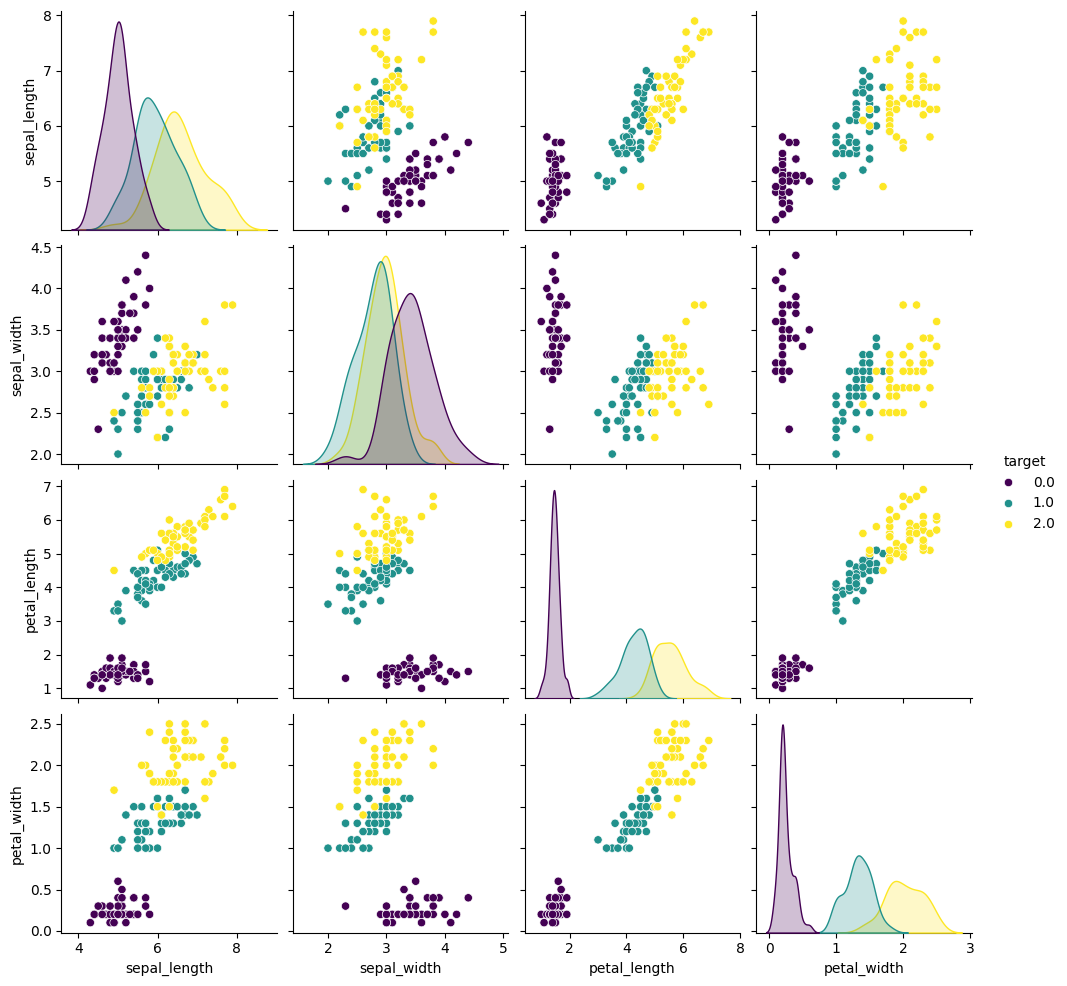

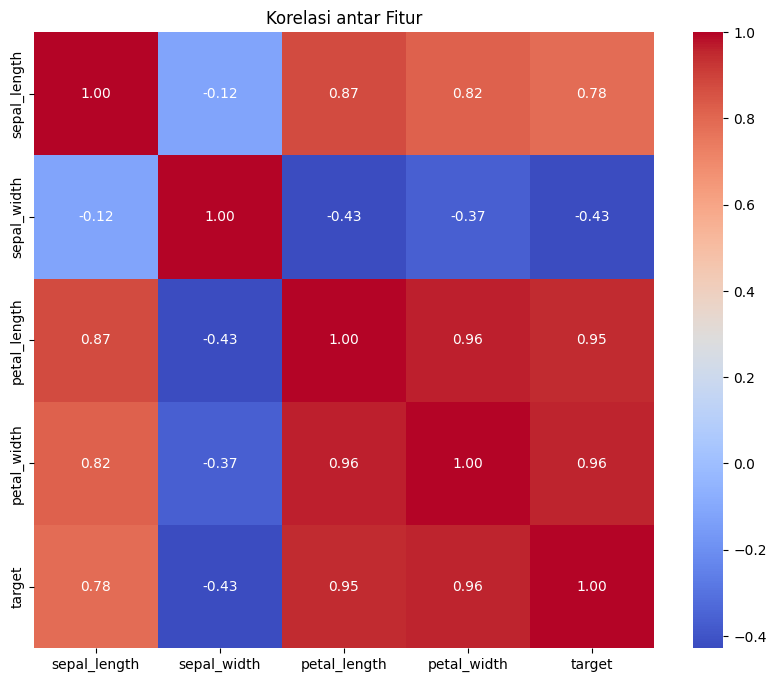

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



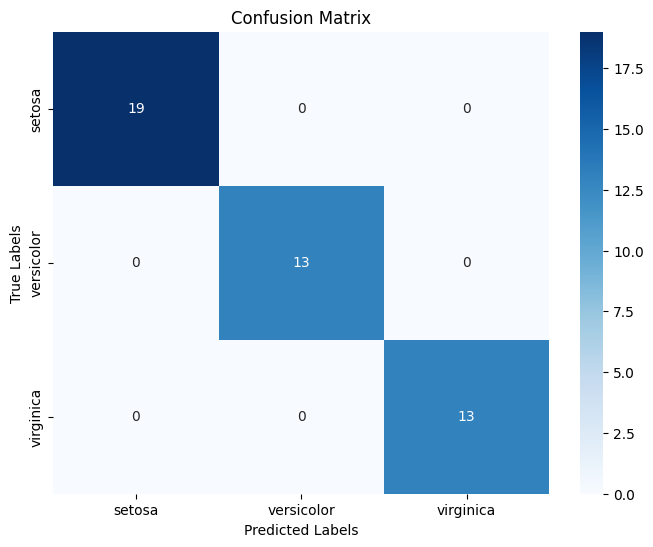

<ipython-input-5-0d6dec8a1308>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], palette='viridis')


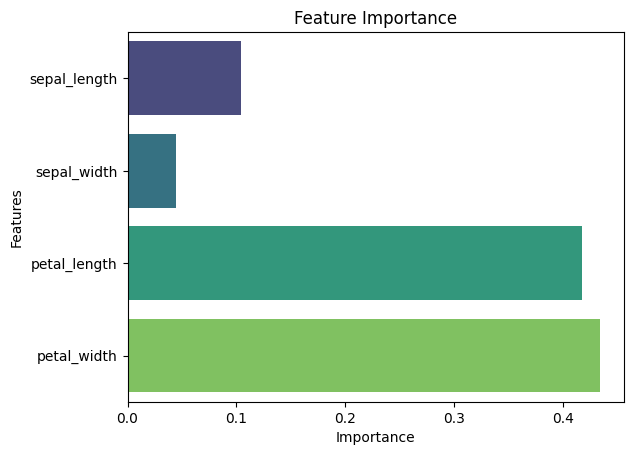

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV score: 0.9666666666666668
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy with Best Parameters: 1.0
Model saved as random_forest_model.pkl


In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib

# 1. Load dataset Iris dari scikit-learn
# Ubah dataset menjadi DataFrame
iris = load_iris()
X, y = iris.data, iris.target
data = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Rename kolom
data.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in data.columns]
print("Kolom dataset setelah penggantian:", data.columns)

# 2. Data Wrangling
# Cek missing values
def check_missing_values(df):
    return df.isnull().sum()

print("Missing Values:\n", check_missing_values(data))

# Rename kolom untuk kemudahan analisis
data.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in data.columns]

# Pastikan nama kolom benar setelah penggantian
print("Nama kolom setelah penggantian:", data.columns)

# Distribusi numerik target
print("\nDistribusi target:\n", data['target'].value_counts())

# 3. Exploratory Data Analysis (EDA)
# Info dataset
print("\nDataset Info:")
data.info()

# Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())

# Distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribusi Target (Spesies)')
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Pairplot untuk melihat distribusi antar fitur
sns.pairplot(data, hue='target', palette='viridis', diag_kind='kde',
             vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # Use the updated column names
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.show()

# 4. Feature Scaling (Opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Inisialisasi model dengan algoritma Random Forest
model = RandomForestClassifier(random_state=42)

# 7. Training model dengan data training
model.fit(X_train, y_train)

# 8. Prediksi menggunakan data testing
y_pred = model.predict(X_test)

# 9. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 10. Feature Importance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 11. Cross-Validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# 12. Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Gunakan best_model untuk evaluasi
y_pred_best = best_model.predict(X_test)
print("\nBest Parameters:", grid_search.best_params_)

# Evaluasi ulang dengan best_model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Parameters:", accuracy_best)

# 13. Save Model
joblib.dump(best_model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")
